In [43]:
# sphereical quantization

from pcdet.datasets.kitti.kitti_dataset import KittiDataset
from pcdet.config import cfg, cfg_from_yaml_file
from pcdet.utils import common_utils
from pathlib import Path


cfg_from_yaml_file('cfgs/kitti_models/sphoxelnet.yaml', cfg)

# args, cfg = parse_config()


logger = common_utils.create_logger()
logger.info(
    '-----------------Quick Demo of OpenPCDet-------------------------')
dataset = KittiDataset(
    dataset_cfg=cfg.DATA_CONFIG, class_names=cfg.CLASS_NAMES, training=False,
    root_path=Path("../data/kitti/"), logger=logger
)
logger.info(f'Total number of samples: \t{len(dataset)}')

2020-09-24 07:28:12,382   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-09-24 07:28:12,382   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-09-24 07:28:12,382   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-09-24 07:28:12,382   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-09-24 07:28:12,388   INFO  Loading KITTI dataset
2020-09-24 07:28:12,388   INFO  Loading KITTI dataset
2020-09-24 07:28:12,388   INFO  Loading KITTI dataset
2020-09-24 07:28:12,388   INFO  Loading KITTI dataset
2020-09-24 07:28:12,552   INFO  Total samples for KITTI dataset: 3769
2020-09-24 07:28:12,552   INFO  Total samples for KITTI dataset: 3769
2020-09-24 07:28:12,552   INFO  Total samples for KITTI dataset: 3769
2020-09-24 07:28:12,552   INFO  Total samples for KITTI dataset: 3769
2020-09-24 07:28:12,574   INFO  Total number of samples: 	3769
2020-09-24 07:28:12,574   INFO  Total number of s

In [44]:
dataset[19]


{'points': array([[ 6.9978e+01,  5.2160e+00,  2.5820e+00,  0.0000e+00],
        [ 6.9250e+01,  6.1470e+00,  2.5600e+00,  0.0000e+00],
        [ 6.9101e+01,  6.3520e+00,  2.5560e+00,  0.0000e+00],
        ...,
        [ 6.2880e+00, -4.1000e-02, -1.6410e+00,  3.0000e-01],
        [ 6.2820e+00, -2.1000e-02, -1.6390e+00,  2.7000e-01],
        [ 6.2860e+00, -1.0000e-03, -1.6410e+00,  3.3000e-01]],
       dtype=float32),
 'frame_id': '000039',
 'calib': <pcdet.utils.calibration_kitti.Calibration at 0x7f151882e450>,
 'gt_boxes': array([[ 7.4599552e+00,  2.7170498e+00, -9.5863760e-01,  4.3000002e+00,
          1.6700000e+00,  1.4800000e+00, -3.1207962e+00,  1.0000000e+00],
        [ 1.6960789e+01, -2.5913665e+00, -9.3544114e-01,  3.6199999e+00,
          1.5400000e+00,  1.4600000e+00, -7.9631805e-04,  1.0000000e+00],
        [ 3.4108936e+01,  2.6207924e+00, -7.0116222e-01,  4.4200001e+00,
          1.5700001e+00,  1.5200000e+00, -3.1407964e+00,  1.0000000e+00],
        [ 2.9770939e+01, -2.6589

In [45]:
rangeV = dataset[19]['rangeV']

In [46]:
feature = rangeV.feature

In [47]:
feature.shape

torch.Size([1, 4, 1, 40, 512])

In [48]:
import matplotlib
import matplotlib.pyplot as plt


In [49]:
# how many points
for i in range(10):
    points = dataset[i]['points']
    print(points.shape[0])
    

18342
17828
18900
19801
19190
14739
16033
14658
20685
19574


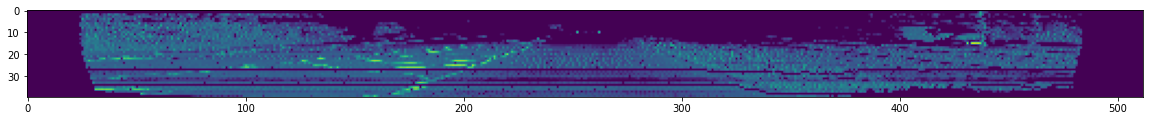

In [50]:
import torch

plt.figure(figsize=(20,10))
image = dataset[59]['rangeV'].feature[0,3,0]
plt.imshow(image)



In [51]:
image.size()

torch.Size([40, 512])

In [52]:
(image>0).sum()

tensor(11581)

In [ ]:
# use function
from sphconv.data import xyz2RangeVoxel

rangeV  = xyz2RangeVoxel(dataset[39]['points'], 40, 512, 512, [87, 103], [-45, 45], [6,70.4])

plt.figure(figsize=(60,10))
image = rangeV.feature[0,3,0]
plt.imshow(image)

In [ ]:
# theta distribution
points = dataset[359]['points']
import numpy as np
def p2theta(points):
    x = points[:,0]; y = points[:,1]; z = points[:,2]
    x2y2 = x * x + y * y
    r = np.sqrt(x2y2 + z * z)
    thetas = np.arccos(z / r)
    return thetas
thetas = p2theta(points)


In [ ]:
plt.plot(np.degrees(thetas))

In [ ]:
for i in range(30):
    image = dataset[i]['rangeV'].feature[0,3,0]
    plt.figure(figsize=(10,10))
    plt.imshow(image)

In [ ]:
# plt.imshow(feature[0,3,0])
# import torchvision.transforms.functional as F
# range_image = F.resize(F.to_pil_image(feature[0,3,0]), (41*2,512))

In [ ]:
plt.plot(image[:,35,0])

In [ ]:
# from second import test_kitti
# range_map = test_kitti.xyz2range_v2(dataset[19]['points'])

In [ ]:
import numpy as np
def xyz2range_v2(points, ith=0, plot_diff=False, visualize=False):
    """
    """
    v_res=26.9/64,
    h_res=90./512.
    x = points[:, 0]  # -71~73
    y = points[:, 1]  # -21~53
    z = points[:, 2]  # -5~2.6
    
    intensity = points[:, 3]  # 0~1
    x2y2 = np.sqrt(np.square(x) + np.square(y))
    distance = np.sqrt(x2y2 + np.square(z))
    # phi
    # arctan2 , and arcsin, almost the same result
    phi = np.arctan2(-y, x)
    # phi_p = np.arcsin(-y / np.sqrt(x ** 2 + y ** 2 ))
    # print("x rad diff", phi, phi_p, np.sum(phi - phi_p))
    angle_diff = np.diff(phi)
    if plot_diff:
        plt.plot(np.diff(phi))
        plt.savefig(fig_path+"angle_diff_{:d}.jpg".format(ith), dpi=300)
        plt.clf()
    threshold_angle = np.radians(10)  # huristic
    angle_diff = np.hstack((angle_diff, 0.0001)) # append one
    # new row when diff bigger than threashold
    angle_diff_mask = angle_diff > threshold_angle
    theta_idx = np.cumsum(angle_diff_mask)
    theta_idx[theta_idx >= 64] = 63
    # print("theta max min", theta_idx.max(), theta_idx.min())
    delta_phi = np.radians(90./512.)
    # delta_phi = np.radians((x.max() - x.min()) / 500.) # doenst work. many missing dots horiizontally
    phi_idx = np.floor((phi / delta_phi)).astype(int)
    phi_idx -= np.min(phi_idx) # translate to positive
    phi_idx[phi_idx >= 512] = 511
    # x_max = int(360.0 / h_res) #+ 1  # 投影后图片的宽度
    x_max = 512
    if visualize:
        depth_gray = np.interp(distance, (distance.min(), distance.max()), (20,255))
        depth_image = np.zeros((64, 512, 1))
        depth_image[theta_idx, phi_idx, 0] = depth_gray
        imageio.imwrite(fig_path + 'range_map_v2_{:d}.jpg'.format(ith),
            depth_image.astype(np.uint8))
    # 可能有 data loss， 有些数据点被覆盖了。
    depth_map = np.zeros((5, 64, 512), dtype=float) #+255
    depth_map[0, theta_idx, phi_idx] = x
    depth_map[1, theta_idx, phi_idx] = y
    depth_map[2, theta_idx, phi_idx] = z
    depth_map[3, theta_idx, phi_idx] = distance
    depth_map[4, theta_idx, phi_idx] = intensity
    return depth_map

In [ ]:
range_map = xyz2range_v2(dataset[19]['points'])
plt.figure(figsize=(20,20))
plt.imshow(range_map[4])

In [ ]:
plt.plot(dataset[19]['points'][:,0])

In [ ]:
plt.plot(dataset[19]['points'][:,1])

In [ ]:
plt.plot(dataset[19]['points'][:,2])

In [ ]:
points = np.fromfile("/home/gx/GitHub/OpenPCDet/data/kitti/training/velodyne/000039.bin").reshape(-1,4)
calib = np.from

range_map = xyz2range_v2(points)
plt.imshow(range_map[4])

In [ ]:
points.shape